In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [60]:
os.getcwd()

'C:\\Users\\KIRTI RAJ PRADHAN\\Downloads'

In [61]:
os.chdir("C:\\Users\\KIRTI RAJ PRADHAN\\Downloads")

In [62]:
df=pd.read_excel("Book 4.xlsx")
df

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,ATTORNEY
0,5,0,1.0,0,50.0,34.940,0
1,3,1,0.0,0,18.0,0.891,1
2,66,0,1.0,0,5.0,0.330,1
3,70,1,1.0,1,31.0,0.037,0
4,96,0,1.0,0,30.0,NaN,1
5,97,1,1.0,0,35.0,0.309,0
6,10,0,NaN,0,9.0,3.538,0
7,36,1,NaN,0,34.0,4.881,0
8,51,1,1.0,0,60.0,0.874,1
9,55,1,1.0,0,NaN,0.350,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   10 non-null     int64  
 1   CLMSEX    10 non-null     int64  
 2   CLMINSUR  8 non-null      float64
 3   SEATBELT  10 non-null     int64  
 4   CLMAGE    9 non-null      float64
 5   LOSS      9 non-null      float64
 6   ATTORNEY  10 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 688.0 bytes


In [64]:
df.isnull().sum()

CASENUM     0
CLMSEX      0
CLMINSUR    2
SEATBELT    0
CLMAGE      1
LOSS        1
ATTORNEY    0
dtype: int64

# check for missing values in each columns

In [65]:
df.isnull().sum()

CASENUM     0
CLMSEX      0
CLMINSUR    2
SEATBELT    0
CLMAGE      1
LOSS        1
ATTORNEY    0
dtype: int64

# Empty cells can potentially gives you wrong analyze data

# Dealing the missing values

## 1) Remove the rows that contain missing values 

In [66]:
df1=df.dropna()
df1

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,ATTORNEY
0,5,0,1.0,0,50.0,34.940,0
1,3,1,0.0,0,18.0,0.891,1
2,66,0,1.0,0,5.0,0.330,1
3,70,1,1.0,1,31.0,0.037,0
5,97,1,1.0,0,35.0,0.309,0
8,51,1,1.0,0,60.0,0.874,1


## .We should not removing >5% of original data
## .This is usually ok, for very big data sets, and removing a few rows will not have a big impact on the result.


# 2. Replace the nan values
#       for continous variable 1st we find out outliers then go to the further parts.

##    conntinous--->1) Mean(no outliers)    2) Median(outliers)

##     descrete------>Mode

continous(descimal contain data)
descrete(without decimal)

# fillna() using pandas

In [67]:
df.rename(columns={'CLMAGE':'AGE'},inplace=True)    # rename column in pandas

In [68]:
df

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,AGE,LOSS,ATTORNEY
0,5,0,1.0,0,50.0,34.940,0
1,3,1,0.0,0,18.0,0.891,1
2,66,0,1.0,0,5.0,0.330,1
3,70,1,1.0,1,31.0,0.037,0
4,96,0,1.0,0,30.0,NaN,1
5,97,1,1.0,0,35.0,0.309,0
6,10,0,NaN,0,9.0,3.538,0
7,36,1,NaN,0,34.0,4.881,0
8,51,1,1.0,0,60.0,0.874,1
9,55,1,1.0,0,NaN,0.350,1


In [69]:
df.describe()

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,AGE,LOSS,ATTORNEY
count,10.000000,10.000000,8.000000,10.000000,9.000000,9.000000,10.000000
mean,48.900000,0.600000,0.875000,0.100000,30.222222,5.127778,0.500000
std,34.999841,0.516398,0.353553,0.316228,17.859016,11.304779,0.527046
min,3.000000,0.000000,0.000000,0.000000,5.000000,0.037000,0.000000
25%,16.500000,0.000000,1.000000,0.000000,18.000000,0.330000,0.000000
50%,53.000000,1.000000,1.000000,0.000000,31.000000,0.874000,0.500000
75%,69.000000,1.000000,1.000000,0.000000,35.000000,3.538000,1.000000
max,97.000000,1.000000,1.000000,1.000000,60.000000,34.940000,1.000000


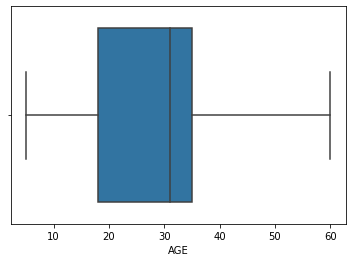

In [70]:
sns.boxplot(x="AGE",data=df)
plt.show()

In [71]:
# for continous variable
# in variable/column ("AGE") can't have any outliers so we can have find the (mean)
df['AGE'].mean()


30.22222222222222

In [72]:
df['AGE'].fillna(30.222,inplace=True)

In [73]:
df

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,AGE,LOSS,ATTORNEY
0,5,0,1.0,0,50.000,34.940,0
1,3,1,0.0,0,18.000,0.891,1
2,66,0,1.0,0,5.000,0.330,1
3,70,1,1.0,1,31.000,0.037,0
4,96,0,1.0,0,30.000,NaN,1
5,97,1,1.0,0,35.000,0.309,0
6,10,0,NaN,0,9.000,3.538,0
7,36,1,NaN,0,34.000,4.881,0
8,51,1,1.0,0,60.000,0.874,1
9,55,1,1.0,0,30.222,0.350,1


In [74]:
df['AGE'].fillna(df['AGE'].mean(),inplace=True)

In [75]:
df

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,AGE,LOSS,ATTORNEY
0,5,0,1.0,0,50.000,34.940,0
1,3,1,0.0,0,18.000,0.891,1
2,66,0,1.0,0,5.000,0.330,1
3,70,1,1.0,1,31.000,0.037,0
4,96,0,1.0,0,30.000,NaN,1
5,97,1,1.0,0,35.000,0.309,0
6,10,0,NaN,0,9.000,3.538,0
7,36,1,NaN,0,34.000,4.881,0
8,51,1,1.0,0,60.000,0.874,1
9,55,1,1.0,0,30.222,0.350,1


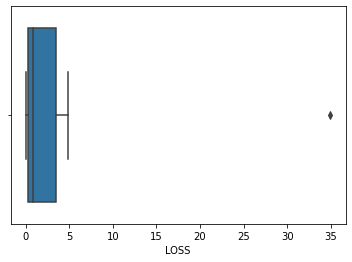

In [76]:
sns.boxplot(x='LOSS',data=df)
plt.show()

In [77]:
# for continous varibale
# "LOSS" column contain outlier so now we can use (median)
df["LOSS"].fillna(df["LOSS"].median(),inplace=True)

In [78]:
df

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,AGE,LOSS,ATTORNEY
0,5,0,1.0,0,50.000,34.940,0
1,3,1,0.0,0,18.000,0.891,1
2,66,0,1.0,0,5.000,0.330,1
3,70,1,1.0,1,31.000,0.037,0
4,96,0,1.0,0,30.000,0.874,1
5,97,1,1.0,0,35.000,0.309,0
6,10,0,NaN,0,9.000,3.538,0
7,36,1,NaN,0,34.000,4.881,0
8,51,1,1.0,0,60.000,0.874,1
9,55,1,1.0,0,30.222,0.350,1


In [79]:
df["LOSS"].median()

0.874

In [80]:
#for discrete variable  
# we always use mode() for discrete variables


In [81]:
df["LOSS"].fillna(df["LOSS"].mode(),inplace=True)

In [82]:
df

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,AGE,LOSS,ATTORNEY
0,5,0,1.0,0,50.000,34.940,0
1,3,1,0.0,0,18.000,0.891,1
2,66,0,1.0,0,5.000,0.330,1
3,70,1,1.0,1,31.000,0.037,0
4,96,0,1.0,0,30.000,0.874,1
5,97,1,1.0,0,35.000,0.309,0
6,10,0,NaN,0,9.000,3.538,0
7,36,1,NaN,0,34.000,4.881,0
8,51,1,1.0,0,60.000,0.874,1
9,55,1,1.0,0,30.222,0.350,1


In [83]:
df["LOSS"].mode()

0    0.874
Name: LOSS, dtype: float64

In [84]:
df.rename(columns={"CLMINSUR":"INSUR"},inplace=True)

In [85]:
df

,CASENUM,CLMSEX,INSUR,SEATBELT,AGE,LOSS,ATTORNEY
0,5,0,1.0,0,50.000,34.940,0
1,3,1,0.0,0,18.000,0.891,1
2,66,0,1.0,0,5.000,0.330,1
3,70,1,1.0,1,31.000,0.037,0
4,96,0,1.0,0,30.000,0.874,1
5,97,1,1.0,0,35.000,0.309,0
6,10,0,NaN,0,9.000,3.538,0
7,36,1,NaN,0,34.000,4.881,0
8,51,1,1.0,0,60.000,0.874,1
9,55,1,1.0,0,30.222,0.350,1


In [86]:
df["INSUR"].fillna(df["INSUR"].mode()[0],inplace=True)     

In [87]:
df

,CASENUM,CLMSEX,INSUR,SEATBELT,AGE,LOSS,ATTORNEY
0,5,0,1.0,0,50.000,34.940,0
1,3,1,0.0,0,18.000,0.891,1
2,66,0,1.0,0,5.000,0.330,1
3,70,1,1.0,1,31.000,0.037,0
4,96,0,1.0,0,30.000,0.874,1
5,97,1,1.0,0,35.000,0.309,0
6,10,0,1.0,0,9.000,3.538,0
7,36,1,1.0,0,34.000,4.881,0
8,51,1,1.0,0,60.000,0.874,1
9,55,1,1.0,0,30.222,0.350,1


# SimpleImputer() using SKlearn

In [88]:
df=pd.read_excel("Book 4.xlsx")
df

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,ATTORNEY
0,5,0,1.0,0,50.0,34.940,0
1,3,1,0.0,0,18.0,0.891,1
2,66,0,1.0,0,5.0,0.330,1
3,70,1,1.0,1,31.0,0.037,0
4,96,0,1.0,0,30.0,NaN,1
5,97,1,1.0,0,35.0,0.309,0
6,10,0,NaN,0,9.0,3.538,0
7,36,1,NaN,0,34.0,4.881,0
8,51,1,1.0,0,60.0,0.874,1
9,55,1,1.0,0,NaN,0.350,1


In [89]:
from sklearn.impute import SimpleImputer

In [93]:
mean_imputer=SimpleImputer(strategy="mean")
df["CLMAGE"]=mean_imputer.fit_transform(df[["CLMAGE"]])
df

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,ATTORNEY
0,5,0,1.0,0,50.000000,34.940,0
1,3,1,0.0,0,18.000000,0.891,1
2,66,0,1.0,0,5.000000,0.330,1
3,70,1,1.0,1,31.000000,0.037,0
4,96,0,1.0,0,30.000000,NaN,1
5,97,1,1.0,0,35.000000,0.309,0
6,10,0,NaN,0,9.000000,3.538,0
7,36,1,NaN,0,34.000000,4.881,0
8,51,1,1.0,0,60.000000,0.874,1
9,55,1,1.0,0,30.222222,0.350,1


In [95]:
median_imputer=SimpleImputer(strategy="median")
df["LOSS"]=median_imputer.fit_transform(df[["LOSS"]])
df

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,ATTORNEY
0,5,0,1.0,0,50.000000,34.940,0
1,3,1,0.0,0,18.000000,0.891,1
2,66,0,1.0,0,5.000000,0.330,1
3,70,1,1.0,1,31.000000,0.037,0
4,96,0,1.0,0,30.000000,0.874,1
5,97,1,1.0,0,35.000000,0.309,0
6,10,0,NaN,0,9.000000,3.538,0
7,36,1,NaN,0,34.000000,4.881,0
8,51,1,1.0,0,60.000000,0.874,1
9,55,1,1.0,0,30.222222,0.350,1


In [96]:
mode_imputer=SimpleImputer(strategy="most_frequent")
df["CLMINSUR"]=mode_imputer.fit_transform(df[["CLMINSUR"]])
df

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,ATTORNEY
0,5,0,1.0,0,50.000000,34.940,0
1,3,1,0.0,0,18.000000,0.891,1
2,66,0,1.0,0,5.000000,0.330,1
3,70,1,1.0,1,31.000000,0.037,0
4,96,0,1.0,0,30.000000,0.874,1
5,97,1,1.0,0,35.000000,0.309,0
6,10,0,1.0,0,9.000000,3.538,0
7,36,1,1.0,0,34.000000,4.881,0
8,51,1,1.0,0,60.000000,0.874,1
9,55,1,1.0,0,30.222222,0.350,1


In [97]:
df.isnull().sum()

CASENUM     0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
ATTORNEY    0
dtype: int64

In [98]:
df["CLMAGE"].fillna(df["CLMAGE"].mean(),inplace=True)
df["LOSS"].fillna(df["LOSS"].median(),inplace=True)
df["CLMINSUR"].fillna(df["CLMINSUR"].mode(),inplace=True)

df.isnull().sum()

CASENUM     0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
ATTORNEY    0
dtype: int64